# Data Mining CMP-7023B
## Lab 6: Unsupervised Learning - Clustering - Examples

### In the last lab exercises

We explained how to apply classification algorithms to our datasets. Identifying the labels and values in order to predict classification targets. We also looked at how we can measure the performance of our algorithms by explaining Accuracy, Precision, Recall, f1-score and ROC curve. 


### This week
In this lab, 

A. We will practice on unsupervised learning/clustering and looking at how we can measure the performance of our algorithms. We will do this again by looking at the Iris dataset but removing the target variable(label). You can then practice further by applying similar operations to another dataset.

We recommend that you look at the Kaggle courses for 'Tutorial for clustering' such as 'Clustering-Python' https://www.kaggle.com/code/fglima21/clustering-python and 'Popular Unsupervised Clustering Algorithms' https://www.kaggle.com/code/fazilbtopal/popular-unsupervised-clustering-algorithms.

B. We will then finish with looking at Mall_Customers dataset. 

### Types of clustering algorithms
First let's see types of clustering algorithms available in Sci-Kit Learn



| Method name                  | Parameters                                                       | Scalability                                                 | Usecase                                                                   | Geometry (metric used)                       |
|------------------------------|------------------------------------------------------------------|-------------------------------------------------------------|---------------------------------------------------------------------------|----------------------------------------------|
| K-Means                      | number of clusters                                               | Very large n_samples, medium n_clusters with MiniBatch code | General-purpose, even cluster size, flat geometry, not too many clusters  | Distances between points                     |
| Affinity propagation         | damping, sample preference                                       | Not scalable with n_samples                                 | Many clusters, uneven cluster size, non-flat geometry                     | Graph distance (e.g. nearest-neighbor graph) |
| Mean-shift                   | bandwidth                                                        | Not scalable with n_samples                                 | Many clusters, uneven cluster size, non-flat geometry                     | Distances between points                     |
| Spectral clustering          | number of clusters                                               | Medium n_samples, small n_clusters                          | Few clusters, even cluster size, non-flat geometry                        | Graph distance (e.g. nearest-neighbor graph) |
| Ward hierarchical clustering | number of clusters or distance threshold                         | Large n_samples and n_clusters                              | Many clusters, possibly connectivity constraints                          | Distances between points                     |
| Agglomerative clustering     | number of clusters or distance threshold, linkage type, distance | Large n_samples and n_clusters                              | Many clusters, possibly connectivity constraints, non Euclidean distances | Any pairwise distance                        |
| DBSCAN                       | neighborhood size                                                | Very large n_samples, medium n_clusters                     | Non-flat geometry, uneven cluster sizes                                   | Distances between nearest points             |
| OPTICS                       | minimum cluster membership                                       | Very large n_samples, large n_clusters                      | Non-flat geometry, uneven cluster sizes, variable cluster density         | Distances between points                     |
| Gaussian mixtures            | many                                                             | Not scalable                                                | Flat geometry, good for density estimation                                | Mahalanobis distances to centers             |
| Birch                        | branching factor, threshold, optional global clusterer.          | Large n_clusters and n_samples                              | Large dataset, outlier removal, data reduction.                           | Euclidean distance between points            |



# A.  Iris dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

## 1. Loading the data

In this example we are using `Iris Flower Dataset`.
As usual we load the data first.

In [2]:
iris = pd.read_csv("C:\DM-DATA\Iris.csv")

#loading the data with the target, but often in clustering examples we won't have a target.


## 2. Data Exploration

In [3]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Petal_length has higher sd than sepal_length, petal_length and sepal_width. So Petal_length dispersed and may help clustering.

### Checking for null values

In [5]:
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

#### Pairplot between features
Now we can use pairplot plot to see pairwise relationships in a dataset.

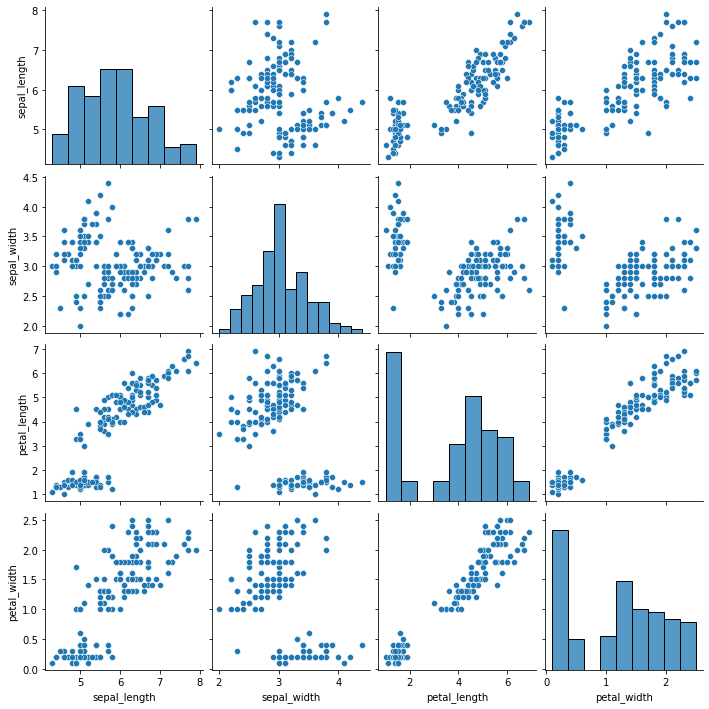

In [6]:
sns.pairplot(iris,kind="scatter")

#### Assign variables to X (input variables)

In [7]:
X = iris[["sepal_length", "petal_length", "petal_width"]].to_numpy()
labels_true = iris["species"]
print(X)
print(labels_true)

[[5.1 1.4 0.2]
 [4.9 1.4 0.2]
 [4.7 1.3 0.2]
 [4.6 1.5 0.2]
 [5.  1.4 0.2]
 [5.4 1.7 0.4]
 [4.6 1.4 0.3]
 [5.  1.5 0.2]
 [4.4 1.4 0.2]
 [4.9 1.5 0.1]
 [5.4 1.5 0.2]
 [4.8 1.6 0.2]
 [4.8 1.4 0.1]
 [4.3 1.1 0.1]
 [5.8 1.2 0.2]
 [5.7 1.5 0.4]
 [5.4 1.3 0.4]
 [5.1 1.4 0.3]
 [5.7 1.7 0.3]
 [5.1 1.5 0.3]
 [5.4 1.7 0.2]
 [5.1 1.5 0.4]
 [4.6 1.  0.2]
 [5.1 1.7 0.5]
 [4.8 1.9 0.2]
 [5.  1.6 0.2]
 [5.  1.6 0.4]
 [5.2 1.5 0.2]
 [5.2 1.4 0.2]
 [4.7 1.6 0.2]
 [4.8 1.6 0.2]
 [5.4 1.5 0.4]
 [5.2 1.5 0.1]
 [5.5 1.4 0.2]
 [4.9 1.5 0.1]
 [5.  1.2 0.2]
 [5.5 1.3 0.2]
 [4.9 1.5 0.1]
 [4.4 1.3 0.2]
 [5.1 1.5 0.2]
 [5.  1.3 0.3]
 [4.5 1.3 0.3]
 [4.4 1.3 0.2]
 [5.  1.6 0.6]
 [5.1 1.9 0.4]
 [4.8 1.4 0.3]
 [5.1 1.6 0.2]
 [4.6 1.4 0.2]
 [5.3 1.5 0.2]
 [5.  1.4 0.2]
 [7.  4.7 1.4]
 [6.4 4.5 1.5]
 [6.9 4.9 1.5]
 [5.5 4.  1.3]
 [6.5 4.6 1.5]
 [5.7 4.5 1.3]
 [6.3 4.7 1.6]
 [4.9 3.3 1. ]
 [6.6 4.6 1.3]
 [5.2 3.9 1.4]
 [5.  3.5 1. ]
 [5.9 4.2 1.5]
 [6.  4.  1. ]
 [6.1 4.7 1.4]
 [5.6 3.6 1.3]
 [6.7 4.4 1.4]
 [5.6 4.5 

## 3. Clustering

### 3.1 K-Means clustering
The most common clustering algorithm is K-Means clustering. 
K-means clustering is a type of unsupervised learning, it is usually used when we don't know their groups/categories. The algorithm assign each data point to one of K groups based on the features similarity.

It is useful to find groups which have not been explicitly labeled in the data. This can be used to confirm business assumptions about what types of groups exist or to identify unknown groups in complex data sets.

The K-Means algorithm clusters data by trying to separate samples in K groups of equal variance, minimizing a criterion known as the inertia or within-cluster sum-of-squares. This algorithm requires the number of clusters to be specified. It scales well to large number of samples and has been used across a large range of application areas in many different fields.

Applying KMeans for k=3

In [8]:
from sklearn.cluster import KMeans

k_means = KMeans(n_clusters=3,random_state=4)
k_means.fit(X)

labels_pred = k_means.predict(X)
labels_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

#### 3.1.1 Elbow Method to Indetify Clusters

Objective: Find optimal value of k in KMeans

Principal:

plots the value of cost function produced by different values of k. When k increases, the data-point can be further "voted" to the nearest cluster and the distances between the respective centroids will decrease. However, the improvements in sum of squared error (SSE) will decline and start to level-off with the increase of k. Such distortion resembles "elbow".

Terms:

Distortion average of the euclidean squared distance from the centroid of the respective clusters

Inertia Sum of squared distances of samples to their closest cluster center

Distortion mainly appear when k is between 3 and 5, so we should try k=2 to 10.

In [9]:
inertias = []
for k in range(2, 11):
    km = KMeans(n_clusters=k, random_state=4).fit(X)
    inertias.append(km.inertia_)

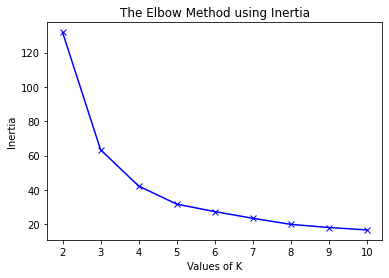

In [10]:
plt.plot(range(2, 11), inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

In the plot above the elbow is at k=3 indicating the optimal k for this dataset is 3

In [11]:
inertias

[131.88150462962963,
 63.35851850594227,
 42.221499665551846,
 31.662157142857144,
 27.329014596273293,
 23.40408126293996,
 19.874669780219783,
 18.036324852683553,
 16.631332345191044]

#### 3.1.2 Viewing the K-Means Clusters

Here we create a 3D scatter plot. Where each axis will correspond to a column of our original iris dataset.

We can plot each point of cluster as color them deterined by the cluster membership.
We can then plot the cluster centres which are the average values of all the members of that cluster.

Finally we can plot the original dataset, using the labels as colors to inpsect the truth.


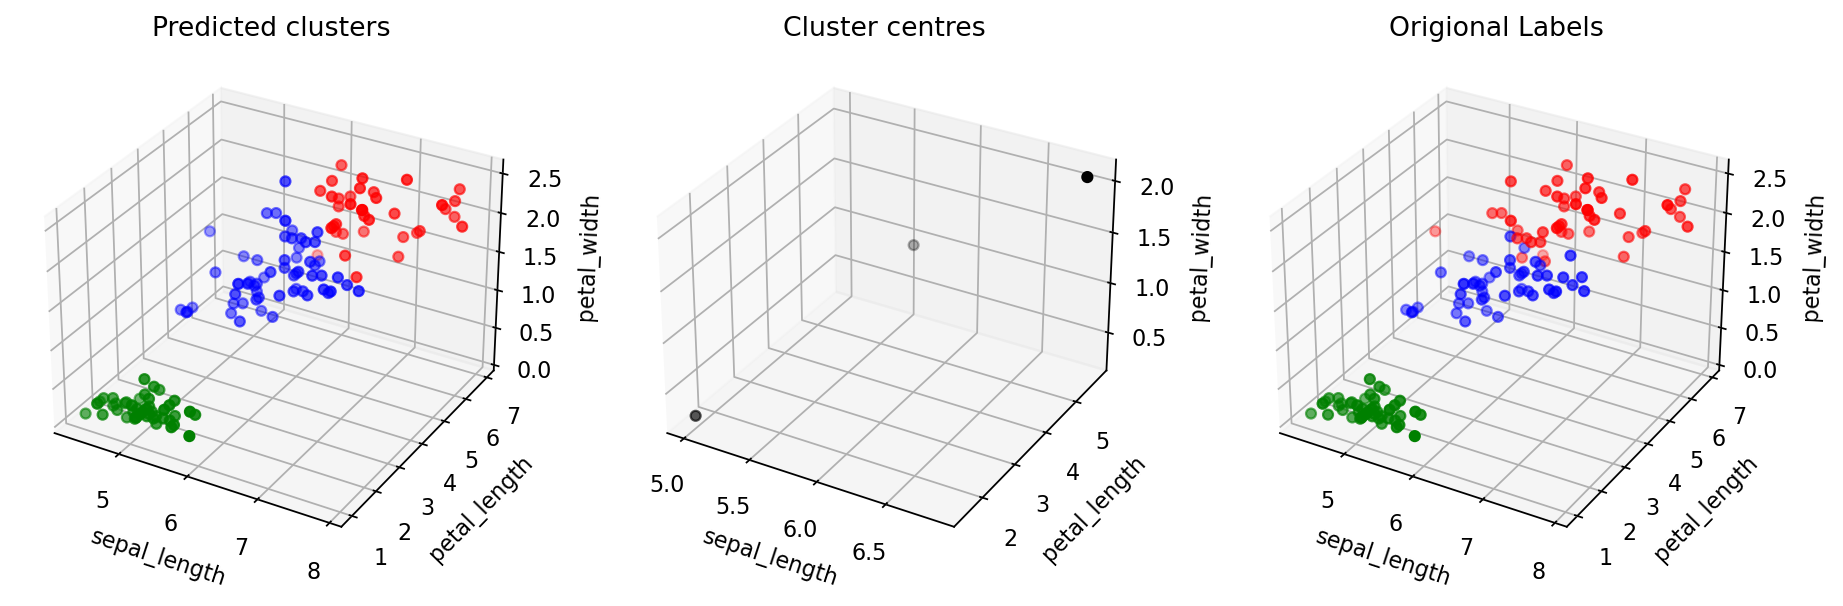

In [12]:
from mpl_toolkits.mplot3d import Axes3D  

import matplotlib.pyplot as plt

colors = ["red", "green", "blue"]

fig = plt.figure(figsize=(14, 6), dpi=160)
ax = fig.add_subplot(1,3,1, projection='3d')
ax1 = fig.add_subplot(1,3,2, projection='3d')
ax2 = fig.add_subplot(1,3,3, projection='3d')

#map the colors to the labels
colors_map = list(map(lambda l: colors[l], labels_pred))

ax.scatter(X[:,0], X[:,1], X[:,2], c=colors_map)
ax.set_xlabel("sepal_length")
ax.set_ylabel("petal_length")
ax.set_zlabel("petal_width")
ax.set_title("Predicted clusters")

#plot the 3 cluster centres
flat_c= ["black","black","black"]
C = k_means.cluster_centers_

ax1.scatter(C[:,0], C[:,1], C[:,2], c=flat_c)
ax1.set_xlabel("sepal_length")
ax1.set_ylabel("petal_length")
ax1.set_zlabel("petal_width")
ax1.set_title("Cluster centres")


#transform the original data to a label encoding of 0,1,2
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
encoding = le.fit_transform(labels_true)

#map the encoding to the colors
colors1 = ["green", "blue", "red"]
colors_orig_map = list(map(lambda l: colors1[l], encoding))

ax2.scatter(X[:,0], X[:,1], X[:,2], c=colors_orig_map)
ax2.set_xlabel("sepal_length")
ax2.set_ylabel("petal_length")
ax2.set_zlabel("petal_width")
ax2.set_title("Origional Labels")

#plt.title("3D Scatter Plot")

plt.show()

### 3.2 Heirachical Clustering

Hierarchical clustering is a general family of clustering algorithms that build nested clusters by merging or splitting them successively. This hierarchy of clusters is represented as a tree (or dendrogram). The root of the tree is the unique cluster that gathers all the samples, the leaves being the clusters with only one sample.

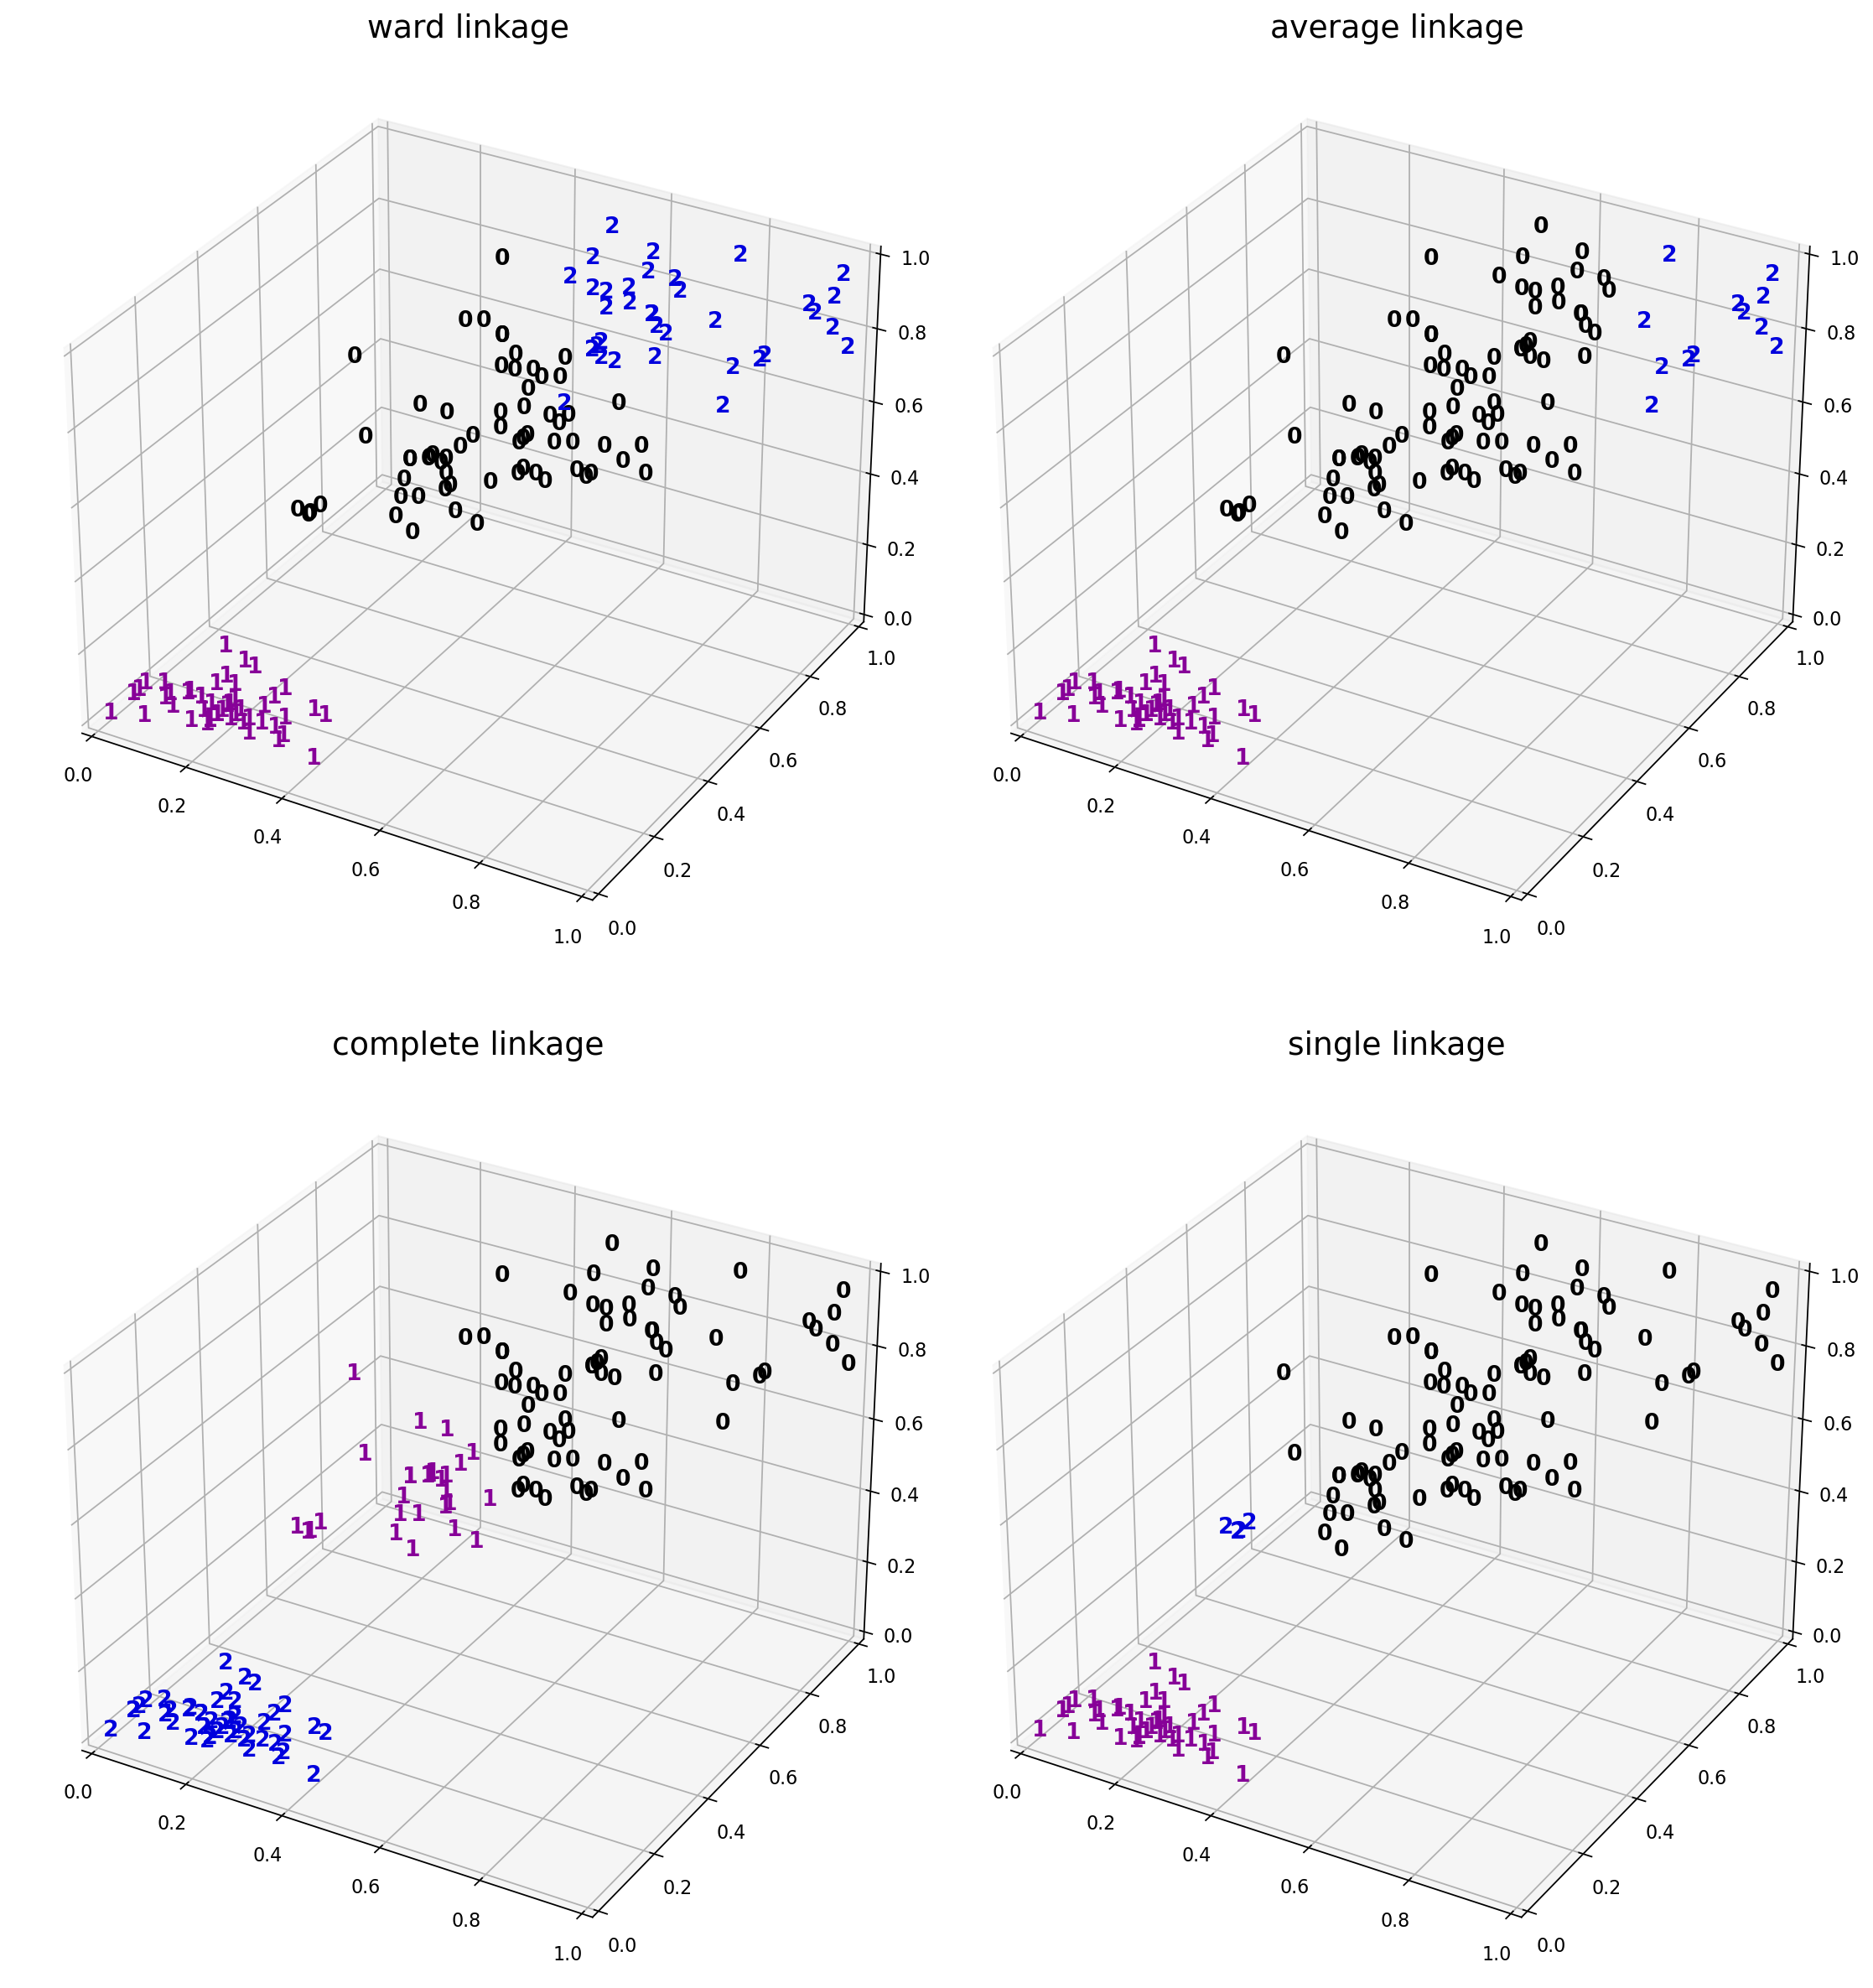

In [13]:
def plot_clustering(X_data, labels, title=None, ax=None):
    x_min, x_max = np.min(X_data, axis=0), np.max(X_data, axis=0)
    X_data = (X_data - x_min) / (x_max - x_min)


    for i in range(X_data.shape[0]):
        ax.text(X_data[i, 0], X_data[i, 1], X_data[i,2], str(labels[i]),
                 color=plt.cm.nipy_spectral(labels[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 12})

    if title is not None:
        ax.set_title(title, size=17)

from mpl_toolkits.mplot3d import Axes3D  

fig = plt.figure(figsize=(14, 18), dpi=160)
ax = fig.add_subplot(2,2,1, projection='3d')
ax1 = fig.add_subplot(2,2,2, projection='3d')
ax2 = fig.add_subplot(2,2,3, projection='3d')
ax3 = fig.add_subplot(2,2,4, projection='3d')

fig.tight_layout(rect=[0, 0.03, 1, 0.95])

from sklearn.cluster import AgglomerativeClustering
for ax_, linkage in zip( (ax,ax1,ax2,ax3),('ward', 'average', 'complete', 'single')):
    clustering = AgglomerativeClustering(linkage=linkage, n_clusters=3)
    clustering.fit(X)
    plot_clustering(X, clustering.labels_, "%s linkage" % linkage, ax_)

## 4. Measuring the performance of unsupervised learning methods

#### 4.1 Rand index adjusted for chance

The Rand Index computes a similarity measure between two clusterings by considering all pairs of samples and counting pairs that are assigned in the same or different clusters in the predicted and true clusterings.

The raw RI score is then “adjusted for chance” into the ARI score using the following scheme:

`ARI = (RI - Expected_RI) / (max(RI) - Expected_RI)`

The adjusted Rand index is thus ensured to have a value close to 0.0 for random labeling independently of the number of clusters and samples and exactly 1.0 when the clusterings are identical (up to a permutation).



In [14]:
from sklearn.metrics.cluster import adjusted_rand_score

score = adjusted_rand_score(labels_true, labels_pred)
score

0.7302382722834697

#### 4.2 Adjusted Mutual Information between two clusterings

Adjusted Mutual Information (AMI) is an adjustment of the Mutual Information (MI) score to account for chance. It accounts for the fact that the MI is generally higher for two clusterings with a larger number of clusters, regardless of whether there is actually more information shared. For two clusterings
and the AMI is given as:

`AMI(U, V) = [MI(U, V) - E(MI(U, V))] / [avg(H(U), H(V)) - E(MI(U, V))]`

This metric is independent of the absolute values of the labels: a permutation of the class or cluster label values won’t change the score value in any way.

In [15]:
from sklearn.metrics.cluster import adjusted_mutual_info_score

score = adjusted_mutual_info_score(labels_true, labels_pred)
score

0.7551191675800483

### unsupervised methods as feature pruning

We can use unsupervised to learn which features are strongly correlated with each other. This can be used as an unsupervised form of feature pruning.



In [16]:
from sklearn.cluster import FeatureAgglomeration

#we have 3 features in the Iris dataset, but we suspect that perhaps we can agglomerate them into 2 features.
agglo = FeatureAgglomeration(n_clusters = 2, linkage="average")
agglo.fit(X)

X_reduced = agglo.transform(X)

k_means = KMeans(3)
k_means.fit(X_reduced)

labels_pred = k_means.predict(X_reduced)
print(labels_pred)


[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 1 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 0 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 2 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


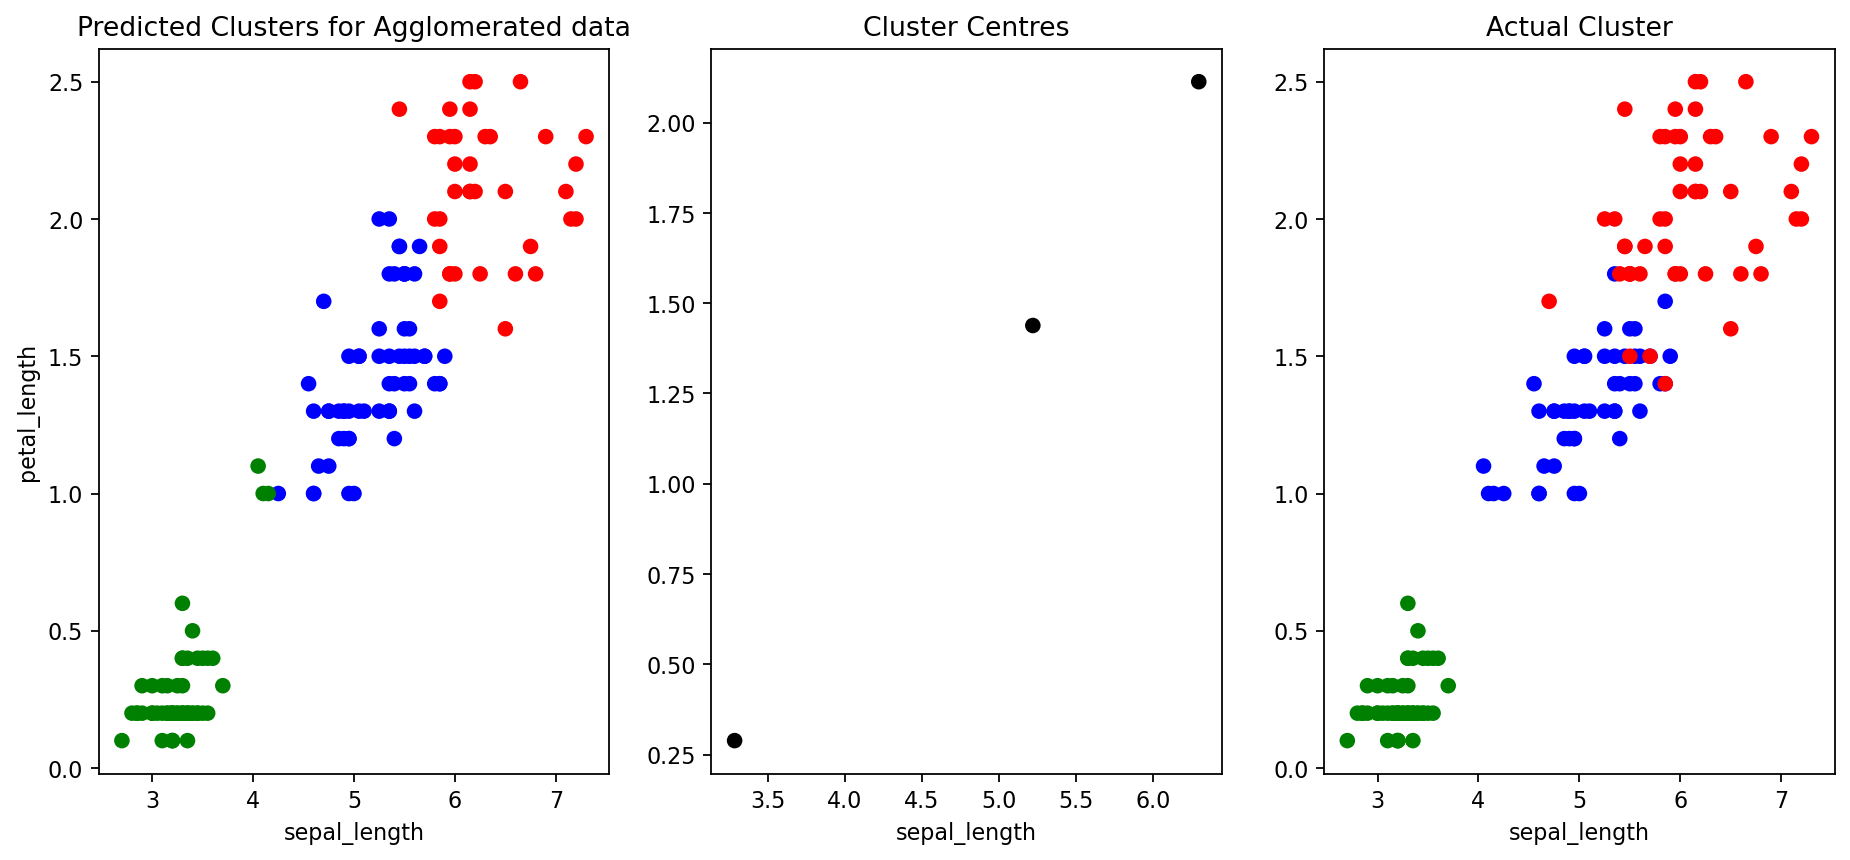

In [17]:
import matplotlib.pyplot as plt
colors = ["red", "green", "blue"]

fig = plt.figure(figsize=(14, 6), dpi=160)
ax = fig.add_subplot(1,3,1)
ax1 = fig.add_subplot(1,3,2)
ax2 = fig.add_subplot(1,3,3)

#map the colors to the labels
colors_map = list(map(lambda l: colors[l], labels_pred))
ax.set_title("Predicted Clusters for Agglomerated data")
ax.scatter(X_reduced[:,0], X_reduced[:,1], c=colors_map)
ax.set_xlabel("sepal_length")
ax.set_ylabel("petal_length")

#plot the 3 cluster centres
flat_c= ["black","black","black"]
C = k_means.cluster_centers_
ax1.scatter(C[:,0], C[:,1], c=flat_c)
ax1.set_title("Cluster Centres")
ax1.set_xlabel("sepal_length")

#map the encoding to the colors
colors1 = ["green", "blue", "red"]
colors_orig_map = list(map(lambda l: colors1[l], encoding))

ax2.scatter(X_reduced[:,0], X_reduced[:,1], c=colors_orig_map)
ax2.set_title("Actual Cluster")
ax2.set_xlabel("sepal_length")


plt.show()

In [18]:
from sklearn.metrics.cluster import adjusted_rand_score

score_reduced = adjusted_rand_score(labels_true, labels_pred)
print("Full features score: ", score)
print("Reduced Features score: ", score_reduced)

Full features score 0.7551191675800483
Reduced Features score:  0.6946067115938924


In this workflow, we used the same clustering methods as before, but we used agglomerative clustering to reduced the feature space by recognising that some of the features were similar to each other.

We then re-fit our KMeans clustering algorithm on the reduced dataset and measured the performance versus the original full feature set. We see a reduction in score across the feature set compared with the original. In part because we went from 3 features to 2. On larger datasets this workflow may maintain accuracy or increase it by removing some of the noise in our data. 




## B. Mall Customers dataset

In this section, we will use Mall Customer dataset which we do not have labels/target variable.

In [19]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

download and read the data in a usual way

In [20]:
df = pd.read_csv('C:\DM-DATA\Mall_Customers.csv')
df.head(10)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


We can rename features as bellow

In [21]:
df.rename(columns={'Genre': 'Gender', 'Annual Income (k$)' : 'Income', 'Spending Score (1-100)' : 'Spending_Score'}, inplace = True)
df.head()

,CustomerID,Gender,Age,Income,Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Checking missing values

In [22]:
# Finding whether there are missing values
df.isnull().sum()

CustomerID        0
Gender            0
Age               0
Income            0
Spending_Score    0
dtype: int64

Descriptive statistics for our continuous features

In [23]:
df.describe()

,CustomerID,Age,Income,Spending_Score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Annual income and spending score have higher sd than age, meaning that they are dispersed and may help clustering.

Descriptive statistics for our categorical feature Gender

In [24]:
df.describe(include='object')

,Gender
count,200
unique,2
top,Female
freq,112


Now we can remove CustomerID as it is not informative

In [25]:
feature = df.drop(columns='CustomerID')

Now we can use pairplot plot to see pairwise relationships in a dataset.

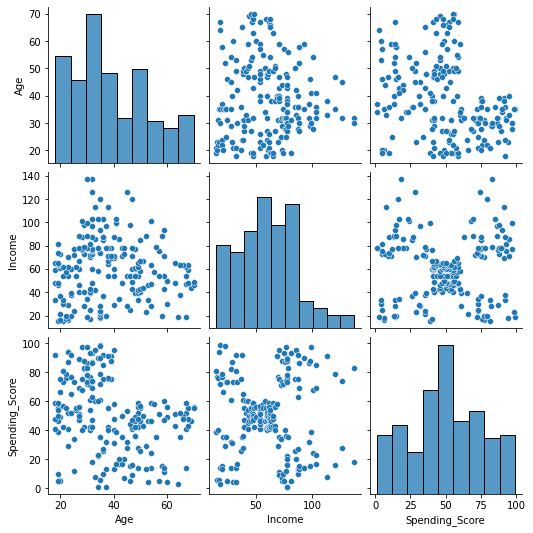

In [26]:
sns.pairplot(feature,kind="scatter")

if we look at the pairplot of annual income and spending score, it is obvious that the customers can be divided into 5 groups.

Combining age and spending, it can be divided into 2 groups: top-left and bottom-right, purchasing power of youngers is relatively higher.

In [27]:
#only use Income and Spending_Score for reasons mentioned above, but you can try with more features and compare outputs
df_Short = df[['Income','Spending_Score']]
df_Short.head()

,Income,Spending_Score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


### Elbow Method to Indetify Clusters

We run the Cluster Analysis using Cluster as 2 till 12. Also, we store the WSS Scores. The WSS score will be used to create the Elbow Plot.

WSS = Within-Cluster-Sum of Squared

In [28]:
import sklearn.cluster as cluster

K = range(2,12)
wss = []
for k in K:
    kmeans=cluster.KMeans(n_clusters=k,init="k-means++")
    kmeans=kmeans.fit(df_Short)
    wss_iter = kmeans.inertia_
    wss.append(wss_iter)

We Store the Number of clusters along with their WSS Scores in a DataFrame

In [29]:
mycenters = pd.DataFrame({'Clusters' : K, 'WSS' : wss})
mycenters

,Clusters,WSS
0,2,181363.595960
1,3,106348.373062
2,4,73679.789039
3,5,44448.455448
4,6,37265.865205
5,7,30241.343618
6,8,25094.432931
7,9,21900.341350
8,10,20085.967541
9,11,17595.288881


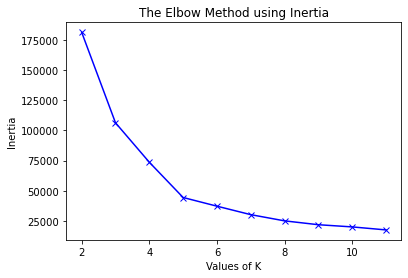

In [30]:
plt.plot(K, wss, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

5 Clusters Identified as per Elbow Method. The bend (or elbow) here at K=5 indicates the optimal number of cluster.

###  Silhouette Method to Indetify Clusters

In [31]:
from sklearn.metrics import silhouette_score
import sklearn.metrics as metrics

SK = range(2,12)
sil_score = []

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in SK:
    labels=cluster.KMeans(n_clusters=k,init="k-means++",random_state=200).fit(df_Short).labels_
    score = metrics.silhouette_score(df_Short,labels,metric="euclidean",sample_size=1000,random_state=200)
    sil_score.append(score)
    print ("Silhouette score for k(clusters) = "+str(k)+" is "
           +str(metrics.silhouette_score(df_Short,labels,metric="euclidean",sample_size=1000,random_state=200)))

Silhouette score for k(clusters) = 2 is 0.2968969162503008
Silhouette score for k(clusters) = 3 is 0.46761358158775423
Silhouette score for k(clusters) = 4 is 0.4931963109249047
Silhouette score for k(clusters) = 5 is 0.553931997444648
Silhouette score for k(clusters) = 6 is 0.5379675585622219
Silhouette score for k(clusters) = 7 is 0.5367379891273258
Silhouette score for k(clusters) = 8 is 0.4592958445675391
Silhouette score for k(clusters) = 9 is 0.45770857148861777
Silhouette score for k(clusters) = 10 is 0.446735677440187
Silhouette score for k(clusters) = 11 is 0.4472950813160941


We Store the Number of clusters along with their Silhouette Scores in a DataFrame

In [32]:
sil_centers = pd.DataFrame({'Clusters' : SK, 'Sil Score' : sil_score})
sil_centers

,Clusters,Sil Score
0,2,0.296897
1,3,0.467614
2,4,0.493196
3,5,0.553932
4,6,0.537968
5,7,0.536738
6,8,0.459296
7,9,0.457709
8,10,0.446736
9,11,0.447295


<AxesSubplot:xlabel='Clusters', ylabel='Sil Score'>

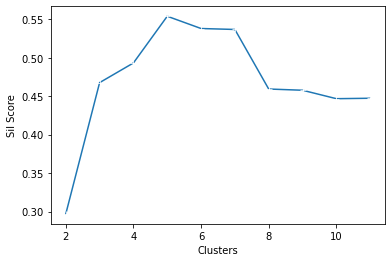

In [33]:
sns.lineplot(x = 'Clusters', y = 'Sil Score', data = sil_centers, marker="+")

Max Silhouette Score as k = 5, Hence 5 Clusters is the right option

### Clustering by k-means

In [34]:
from sklearn.cluster import KMeans

#### Perform K-Mean Clustering with 5 Clusters
Since both elbow and Max Silhouette Score identified k=5 as an optimal number of clusters we perform K-Mean Clustering with 5 Clusters.

Text(0.5, 1.0, 'Customer segmentation by 5 groups')

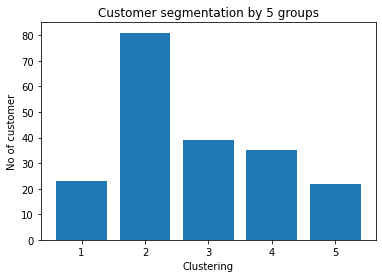

In [35]:
# No of customers in each group respectively
km = KMeans(n_clusters=5).fit(df_Short)
y_km = km.fit_predict(df_Short)
n_cluster, km_count = np.unique(y_km, return_counts=True)

plt.bar(n_cluster+1, km_count)
plt.ylabel('No of customer')
plt.xlabel('Clustering')
plt.title('Customer segmentation by 5 groups')

#### Visualization
Plot Clusters on Chart

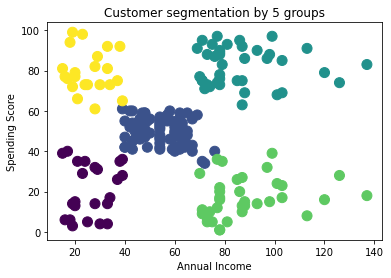

In [36]:
plt.scatter(df_Short['Income'], 
            df_Short['Spending_Score'], 
            c=y_km, s=100)

plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Customer segmentation by 5 groups')

plt.show()

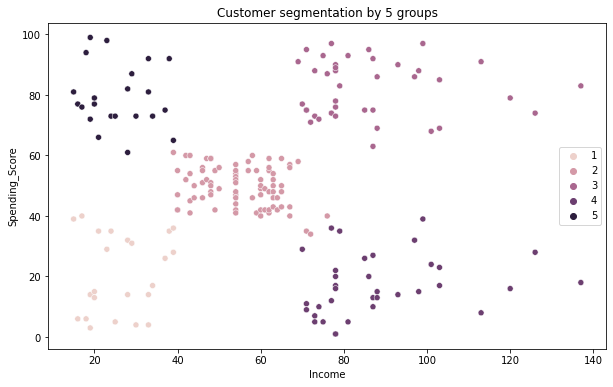

In [37]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_Short, x='Income', y='Spending_Score', hue=y_km+1)
plt.title('Customer segmentation by 5 groups')
plt.show()

### Now you can apply your knowledge learned here to Lab 6: Unsupervised Learning - Clustering - practice